In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- load the datset
- look at the data `(head, tail, sample)`
    - get the information about the datatype `(dtypes)`
    - get the information about the columns `(info)`
    - check how many rows are missing in each column `(isnull, isna)`
    - get statistical information about the dataset `(describe)`
- if required, `clean` the dataset
    - remove the rows with missing values
    - remove the columns with missing values or they are not required
- if required, transform the dataset
    - convert the categorical columns to numerical columns
    - convert the numerical columns to categorical columns
- if required, convert the datatypes of the columns
- if required, create new columns
- if required, rename the columns
- if required, remove the duplicates
- if required, remove the outliers
- if required, scale the dataset (standardization or normalization)
- sort the dataset
- visualize the data
    - univariate analysis
        - visualizing a single column
            - histogram
            - boxplot
            - line
            - bar
            - pie
            - area
    - bivariate analysis
        - visualizing two columns
            - scatter (bubble)
            - line
            - bar
            - pie
            - area
    - multivariate analysis
        - visualizing more than two columns
            - scatter (bubble)
            - surface
---
**Note: If the dataset is too large, then take a sample of the dataset and perform the above steps.**

In [2]:
df = pd.read_json('flipkart_fashion_products_dataset.json')

In [3]:
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [4]:
df.shape

(30000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              30000 non-null  object        
 1   actual_price     30000 non-null  object        
 2   average_rating   30000 non-null  object        
 3   brand            30000 non-null  object        
 4   category         30000 non-null  object        
 5   crawled_at       30000 non-null  datetime64[ns]
 6   description      30000 non-null  object        
 7   discount         30000 non-null  object        
 8   images           30000 non-null  object        
 9   out_of_stock     30000 non-null  bool          
 10  pid              30000 non-null  object        
 11  product_details  30000 non-null  object        
 12  seller           30000 non-null  object        
 13  selling_price    30000 non-null  object        
 14  sub_category     30000 non-null  objec

In [6]:
df.describe()

,crawled_at
count,30000
mean,2021-02-10 22:55:06.673900032
min,2021-02-10 20:11:51
25%,2021-02-10 21:31:38
50%,2021-02-10 23:01:10
75%,2021-02-11 00:16:29
max,2021-02-11 01:31:55


In [7]:
# missing values
df.isnull().sum()

_id                0
actual_price       0
average_rating     0
brand              0
category           0
crawled_at         0
description        0
discount           0
images             0
out_of_stock       0
pid                0
product_details    0
seller             0
selling_price      0
sub_category       0
title              0
url                0
dtype: int64

In [8]:
# removing unwanted columns
cols_to_delete = ['_id', 'pid', 'url','images']
df.drop(cols_to_delete, axis=1, inplace=True)
df.head()

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,product_details,seller,selling_price,sub_category,title
0,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,False,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants
1,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,False,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants
2,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,False,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants
3,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,False,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants
4,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,False,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants"


In [9]:
def clean_price(price):
    if price is None:
        return np.nan
    elif isinstance(price, str):
        price = price.replace(',', '')
        if price:
            price = float(price)
        else:
            price = np.nan
        return price
    else:
        return price


df['actual_price'] = df['actual_price'].apply(clean_price)

In [10]:
def clean_discount(value):
    if value is None:
        return np.nan
    elif isinstance(value, str):
        value = value.replace('% off', '')
        if value:
            value = float(value)
        else:
            value = np.nan
        return value
    else:
        return value

df['discount'] = df['discount'].apply(clean_discount)

In [11]:
def clean_rating(value):
    if value is None:
        return np.nan
    elif isinstance(value, str):
        if value:
            value = float(value)
        else:
            value = np.nan
        return value
    else:
        return value

df['average_rating'] = df['average_rating'].apply(clean_rating)

In [12]:
df['selling_price'] = df['selling_price'].apply(clean_price)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   actual_price     29137 non-null  float64       
 1   average_rating   27554 non-null  float64       
 2   brand            30000 non-null  object        
 3   category         30000 non-null  object        
 4   crawled_at       30000 non-null  datetime64[ns]
 5   description      30000 non-null  object        
 6   discount         29059 non-null  float64       
 7   out_of_stock     30000 non-null  bool          
 8   product_details  30000 non-null  object        
 9   seller           30000 non-null  object        
 10  selling_price    29998 non-null  float64       
 11  sub_category     30000 non-null  object        
 12  title            30000 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(4), object(7)
memory usage: 2.8+ MB


In [14]:
df.head()

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,product_details,seller,selling_price,sub_category,title
0,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69.0,False,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear,Solid Men Multicolor Track Pants
1,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66.0,False,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.0,Bottomwear,Solid Men Blue Track Pants
2,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68.0,False,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931.0,Bottomwear,Solid Men Multicolor Track Pants
3,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69.0,False,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911.0,Bottomwear,Solid Men Multicolor Track Pants
4,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68.0,False,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear,"Solid Men Brown, Grey Track Pants"


In [15]:
df.drop_duplicates(subset='title') # just a demo

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,product_details,seller,selling_price,sub_category,title
0,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69.0,False,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921.0,Bottomwear,Solid Men Multicolor Track Pants
1,1499.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66.0,False,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499.0,Bottomwear,Solid Men Blue Track Pants
4,2999.0,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68.0,False,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943.0,Bottomwear,"Solid Men Brown, Grey Track Pants"
6,1499.0,3.8,York,Clothing and Accessories,2021-02-10 20:11:54,Yorker trackpants made from 100% rich combed c...,68.0,False,"[{'Style Code': '1005NAVI'}, {'Closure': 'Elas...",Shyam Enterprises,466.0,Bottomwear,Solid Men Dark Blue Track Pants
7,1499.0,3.8,York,Clothing and Accessories,2021-02-10 20:11:55,Yorker trackpants made from 100% rich combed c...,63.0,False,"[{'Style Code': '1005DSKIN'}, {'Closure': 'Ela...",Shyam Enterprises,545.0,Bottomwear,Solid Men Beige Track Pants
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29984,999.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:49,,49.0,False,"[{'Type': 'Round Neck'}, {'Sleeve': 'Full Slee...",OKANE,500.0,Topwear,"Striped Men Round Neck Red, White T-Shirt"
29987,949.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:50,,34.0,False,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Colo...",OKANE,617.0,Bottomwear,Color Block Men Multicolor Sports Shorts
29992,799.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:52,‘OKANE’ endeavors to continue to be a leader i...,49.0,False,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Soli...",OKANE,400.0,Bottomwear,Solid Men Black Night Shorts
29994,949.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:31:53,,34.0,False,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Chec...",OKANE,617.0,Bottomwear,Checkered Men Multicolor Regular Shorts


In [16]:
print(df.columns.tolist())

['actual_price', 'average_rating', 'brand', 'category', 'crawled_at', 'description', 'discount', 'out_of_stock', 'product_details', 'seller', 'selling_price', 'sub_category', 'title']


In [17]:
# rename a column
df.rename(columns={'product_details':'details'}, inplace=True)

In [18]:
df.sort_values(by=['actual_price','discount'], ascending=False, inplace=True)

In [19]:

pricesdf = df[['title','actual_price','discount','average_rating','selling_price']]

<Axes: ylabel='Frequency'>

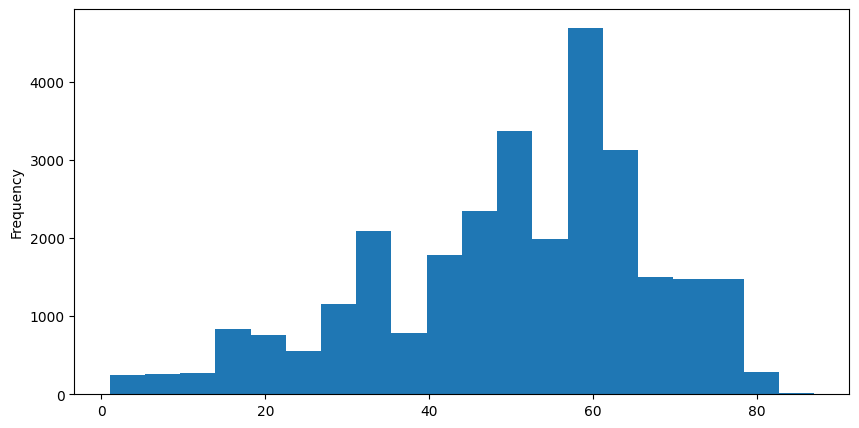

In [20]:
pricesdf['discount'].plot.hist(bins=20, figsize=(10,5))

In [21]:
# styling your dataframe
pricesdf.head(30).style.bar(subset=['actual_price','selling_price'], color='#330033')

,title,actual_price,discount,average_rating,selling_price
10749,3 Piece Solid Men Suit,12999.000000,60.000000,2.400000,5199.000000
10767,2 Piece Self Design Men Suit,12999.000000,60.000000,2.800000,5199.000000
10801,2 Piece Solid Men Suit,12999.000000,60.000000,2.300000,5199.000000
27130,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27170,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27410,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27809,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27627,Full Sleeve Solid Men Casual Jacket,12999.000000,40.000000,3.700000,7799.000000
27971,Full Sleeve Printed Men Sweatshirt,12999.000000,40.000000,4.500000,7799.000000
7355,Skinny Men Blue Jeans,12990.000000,40.000000,4.200000,7794.000000


In [22]:
# styling your dataframe
pricesdf.head(100).style.background_gradient(subset=['average_rating'])

,title,actual_price,discount,average_rating,selling_price
10749,3 Piece Solid Men Suit,12999.000000,60.000000,2.400000,5199.000000
10767,2 Piece Self Design Men Suit,12999.000000,60.000000,2.800000,5199.000000
10801,2 Piece Solid Men Suit,12999.000000,60.000000,2.300000,5199.000000
27130,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27170,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27410,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27809,Full Sleeve Solid Men Casual Jacket,12999.000000,50.000000,3.700000,6499.000000
27627,Full Sleeve Solid Men Casual Jacket,12999.000000,40.000000,3.700000,7799.000000
27971,Full Sleeve Printed Men Sweatshirt,12999.000000,40.000000,4.500000,7799.000000
7355,Skinny Men Blue Jeans,12990.000000,40.000000,4.200000,7794.000000


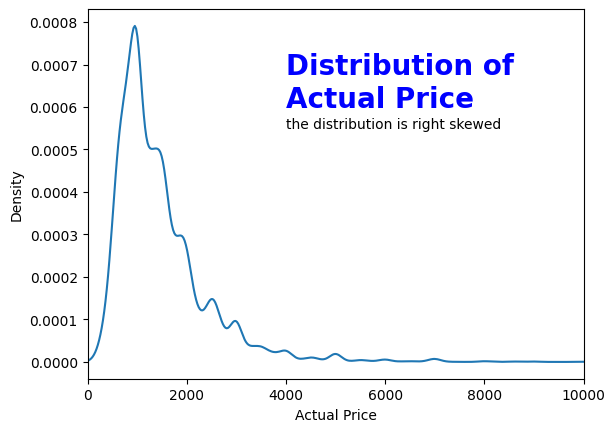

In [23]:
pricesdf['actual_price'].plot.kde()
plt.xlim(0, 10000)
plt.xlabel('Actual Price')
plt.text(4000, 0.0006, 'Distribution of\nActual Price', 
         fontsize=20, fontweight='bold', color='blue')
conclusion = 'the distribution is right skewed'
plt.text(4000, 0.00055, conclusion, fontsize=10)
plt.show()

In [24]:
pricesdf['actual_price'].describe()

count    29137.000000
mean      1472.617703
std        963.263221
min        150.000000
25%        865.000000
50%       1249.000000
75%       1799.000000
max      12999.000000
Name: actual_price, dtype: float64

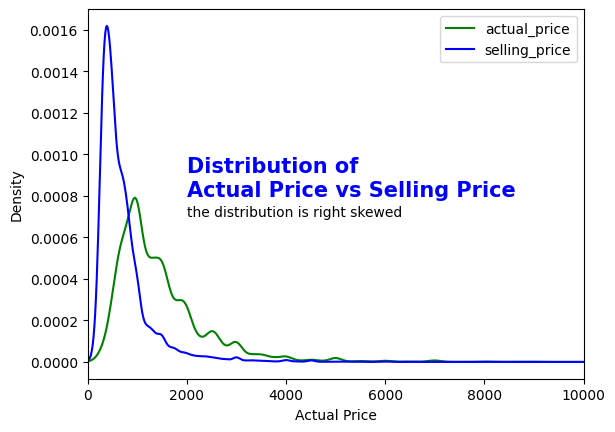

In [25]:
pricesdf[['actual_price', 'selling_price']].plot.kde(color=['green', 'blue'])
plt.xlim(0, 10000)
plt.xlabel('Actual Price')
plt.text(2000, 0.0008, 'Distribution of\nActual Price vs Selling Price', 
         fontsize=15, fontweight='bold', color='blue')
conclusion = 'the distribution is right skewed'
plt.text(2000, 0.0007, conclusion, fontsize=10)
plt.show()

<Axes: xlabel='actual_price', ylabel='selling_price'>

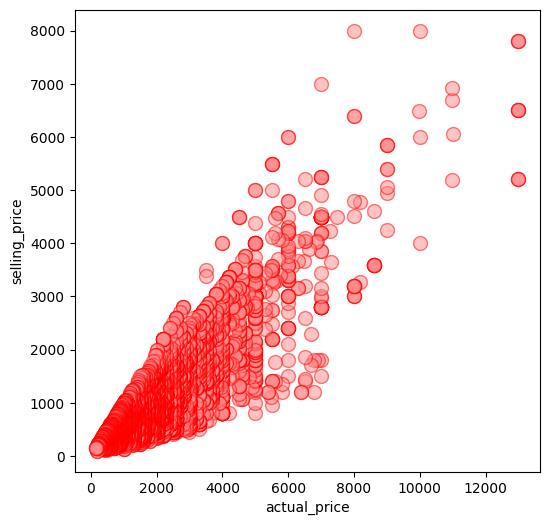

In [26]:
pricesdf.plot.scatter(x='actual_price', y='selling_price', 
                      color='#ff8888', alpha=.5, s=100, 
                      edgecolor='red', figsize=(6,6))

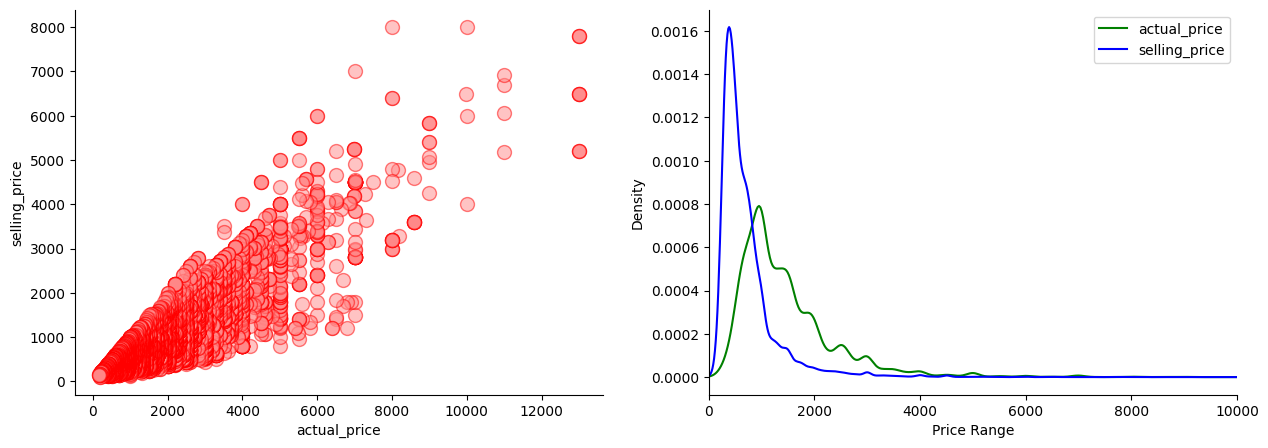

In [27]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
pricesdf.plot.scatter(x='actual_price', y='selling_price', 
                      color='#ff8888', alpha=.5, s=100, 
                      edgecolor='red', ax=ax[0],)
pricesdf[['actual_price', 'selling_price']].plot.kde(color=['green', 'blue'], ax=ax[1])
ax[1].set_xlim(0, 10000)
ax[1].set_xlabel('Price Range')
# hide the spines
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


In [28]:
pricesdf

,title,actual_price,discount,average_rating,selling_price
10749,3 Piece Solid Men Suit,12999.0,60.0,2.4,5199.0
10767,2 Piece Self Design Men Suit,12999.0,60.0,2.8,5199.0
10801,2 Piece Solid Men Suit,12999.0,60.0,2.3,5199.0
27130,Full Sleeve Solid Men Casual Jacket,12999.0,50.0,3.7,6499.0
27170,Full Sleeve Solid Men Casual Jacket,12999.0,50.0,3.7,6499.0
...,...,...,...,...,...
27949,Solid Men Black Track Pants,NaN,NaN,3.6,3999.0
27993,Solid Men Black Track Pants,NaN,NaN,3.6,3999.0
28100,Solid Men Polo Neck Dark Blue T-Shirt,NaN,NaN,5.0,399.0
28129,macroman m series Men Vest,NaN,NaN,NaN,289.0


In [29]:
df[df['actual_price'] < 1000]

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,details,seller,selling_price,sub_category,title
945,999.0,4.1,Jack Roy,Clothing and Accessories,2021-02-10 20:20:53,t-shirt,86.0,True,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",,136.0,Topwear,Printed Men Round Neck Grey T-Shirt
946,999.0,4.7,Jack Roy,Clothing and Accessories,2021-02-10 20:20:53,Jack Royal t-shirts is made of pure cotton and...,86.0,False,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",Jackson Consolidate,136.0,Topwear,Printed Men Round Neck White T-Shirt
2620,999.0,4.1,,Clothing and Accessories,2021-02-10 20:37:51,Grab These Every Day Men's Essentials And Make...,80.0,True,[{'Model Name': 'Tripin Black And Silver Round...,,199.0,Clothing Accessories,Tripin Brass Cufflink Set (Black)
2626,999.0,4.1,,Clothing and Accessories,2021-02-10 20:37:54,Grab These Every Day Men's Essentials And Make...,80.0,True,[{'Model Name': 'Black Cufflinks With Glitter'...,,199.0,Clothing Accessories,Tripin Brass Cufflink (Black)
2629,999.0,3.8,,Clothing and Accessories,2021-02-10 20:37:55,Cufflinks Set A Man Apart. You Just Feel Bette...,80.0,False,[{'Model Name': 'TRIPIN SILVER CUFFLINKS FOR M...,TRIPIN,199.0,Clothing Accessories,Tripin Brass Cufflink & Tie Pin Set (Silver)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20153,179.0,3.3,Thug Li,Clothing and Accessories,2021-02-10 23:52:31,"Slouchy beanie is head-hugging, round close-fi...",5.0,False,"[{'Fabric': 'Wool Blend'}, {'Color': 'Multicol...",GlobalEnterprises52,170.0,Clothing Accessories,slouchy beanie Cap (Pack of 2)
26891,170.0,3.7,,Clothing and Accessories,2021-02-11 01:01:54,,5.0,False,"[{'Neck': 'Scoop Neck'}, {'Pattern': 'Solid'},...",TOMBURG,160.0,Innerwear and Swimwear,TOM BURG Men Vest
8811,158.0,4.6,,Clothing and Accessories,2021-02-10 21:48:47,,10.0,True,"[{'Pattern': 'Solid'}, {'Sleeve': 'Sleeveless'...",,142.0,Innerwear and Swimwear,VIP Men Vest (Pack of 2)
26914,150.0,3.8,,Clothing and Accessories,2021-02-11 01:02:07,Good quality product,6.0,False,"[{'Pattern': 'Solid'}, {'Sleeve': 'Sleeveless'...",TOMBURG,140.0,Innerwear and Swimwear,TOM BURG Men Vest


In [30]:
df[df['brand'] == 'Jack Roy']

,actual_price,average_rating,brand,category,crawled_at,description,discount,out_of_stock,details,seller,selling_price,sub_category,title
948,2596.0,4.2,Jack Roy,Clothing and Accessories,2021-02-10 20:20:54,Contemporary charm meets classic style in this...,81.0,True,"[{'Pack of': '2'}, {'Model Name': 'Set of 2 Co...",,478.0,Topwear,Men Slim Fit Solid Cut Away Collar Casual Shir...
950,1298.0,3.9,Jack Roy,Clothing and Accessories,2021-02-10 20:20:55,Dress better than your boss in the Casual shir...,77.0,False,"[{'Pack of': '1'}, {'Model Name': 'Men's Shirt...",Jackson Consolidate,298.0,Topwear,Men Slim Fit Self Design Cut Away Collar Forma...
945,999.0,4.1,Jack Roy,Clothing and Accessories,2021-02-10 20:20:53,t-shirt,86.0,True,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",,136.0,Topwear,Printed Men Round Neck Grey T-Shirt
946,999.0,4.7,Jack Roy,Clothing and Accessories,2021-02-10 20:20:53,Jack Royal t-shirts is made of pure cotton and...,86.0,False,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",Jackson Consolidate,136.0,Topwear,Printed Men Round Neck White T-Shirt
949,998.0,3.0,Jack Roy,Clothing and Accessories,2021-02-10 20:20:55,Jack Royal t-shirts is made of pure cotton and...,87.0,False,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",Jackson Consolidate,128.0,Topwear,Printed Men Round Neck White T-Shirt
947,998.0,3.9,Jack Roy,Clothing and Accessories,2021-02-10 20:20:53,Jack Royal t-shirts is made of pure cotton and...,82.0,False,"[{'Type': 'Round or Crew'}, {'Sleeve': 'Half S...",Jackson Consolidate,178.0,Topwear,Printed Men Round or Crew White T-Shirt
951,998.0,3.8,Jack Roy,Clothing and Accessories,2021-02-10 20:20:56,Jack Royal Presents you the range of trendy mo...,77.0,False,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",Jackson Consolidate,223.0,Topwear,Printed Men Round Neck White T-Shirt
952,998.0,2.9,Jack Roy,Clothing and Accessories,2021-02-10 20:20:56,Jack Royal Presents you the range of trendy mo...,77.0,True,"[{'Type': 'Round Neck'}, {'Sleeve': 'Half Slee...",,223.0,Topwear,Solid Men Round Neck White T-Shirt
